### Pinhole Camera model for NeRF
other camera models can also be used but the easiest and the most used one is the pinhole model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

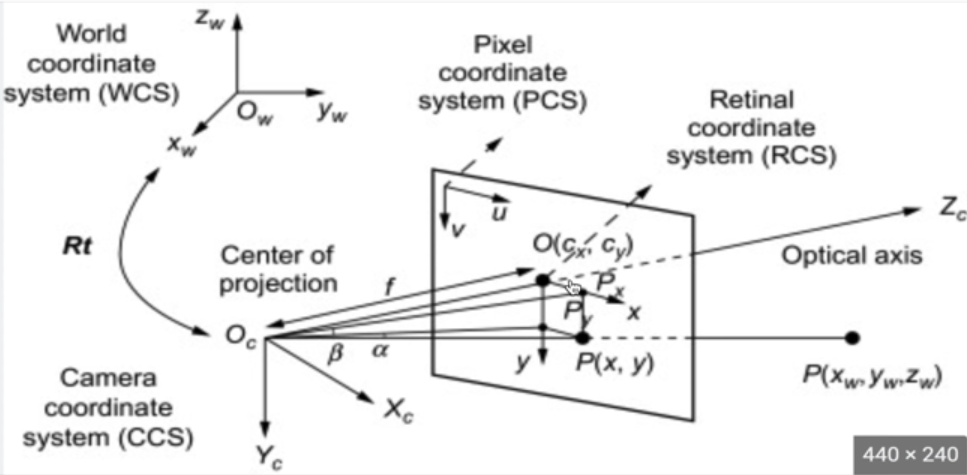

In [3]:
H = 400
W = 400
f = 1200

In [4]:
rays_origin = np.zeros((H*W, 3)) #3 coz 3d
rays_direction = np.zeros((H*W, 3))

u = np.arange(W)
v = np.arange(H)

#creating a coordinate grid
u, v = np.meshgrid(u, v)
print(f"u grid values: \n{u}\n")
print(f"v grid values: \n{v}")
rays_direction.shape

u grid values: 
[[  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]
 ...
 [  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]
 [  0   1   2 ... 397 398 399]]

v grid values: 
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [397 397 397 ... 397 397 397]
 [398 398 398 ... 398 398 398]
 [399 399 399 ... 399 399 399]]


(160000, 3)

### direction of vec from grid to origin

In [5]:
x = u - (W/2)  # we want origin to have direction (0, 0, z) not (200, 200, z)
y = v - (H/2)
z = np.ones_like(u) * f

x.shape, y.shape, z.shape

((400, 400), (400, 400), (400, 400))

In [6]:
dirs = np.stack((x,
                 -y, # negative since we want y axis downwards(refer to the image above)
                 -z), axis=-1) # z faces us, therfore -z from origin to plane

dirs.shape

(400, 400, 3)

In [9]:
dirs[0]

array([[ -200.,   200., -1200.],
       [ -199.,   200., -1200.],
       [ -198.,   200., -1200.],
       ...,
       [  197.,   200., -1200.],
       [  198.,   200., -1200.],
       [  199.,   200., -1200.]])

-200.,   200., -1200.

-400.,   400., -2400.

both are the same

In [11]:
#origin at 
dirs[200,200]

array([    0.,    -0., -1200.])

### normalizing the rays

In [16]:
rays_direction = dirs / np.linalg.norm(dirs, axis=-1, keepdims=True) #normalize along the 3rd dimensioni
rays_direction[0], rays_direction.shape

(array([[-0.16222142,  0.16222142, -0.97332853],
        [-0.1614315 ,  0.16224272, -0.9734563 ],
        [-0.16064128,  0.16226391, -0.97358349],
        ...,
        [ 0.15985074,  0.16228501, -0.97371008],
        [ 0.16064128,  0.16226391, -0.97358349],
        [ 0.1614315 ,  0.16224272, -0.9734563 ]]),
 (400, 400, 3))

In [19]:
#normalized origin now at 
rays_direction[200,200]

array([ 0., -0., -1.])

In [20]:
def plot_rays(o, d, t):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    
    pt1 = o
    pt2 = o + t * d
    
    for p1, p2 in zip(pt1[::50], pt2[::50]):
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]])
    
    
    plt.xlabel('$X$ - coord')
    plt.ylabel('$Y$ - coord')
    plt.legend()
    plt.show()

In [21]:
rays_direction.reshape(-1, 3).shape, rays_direction.shape

((160000, 3), (400, 400, 3))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


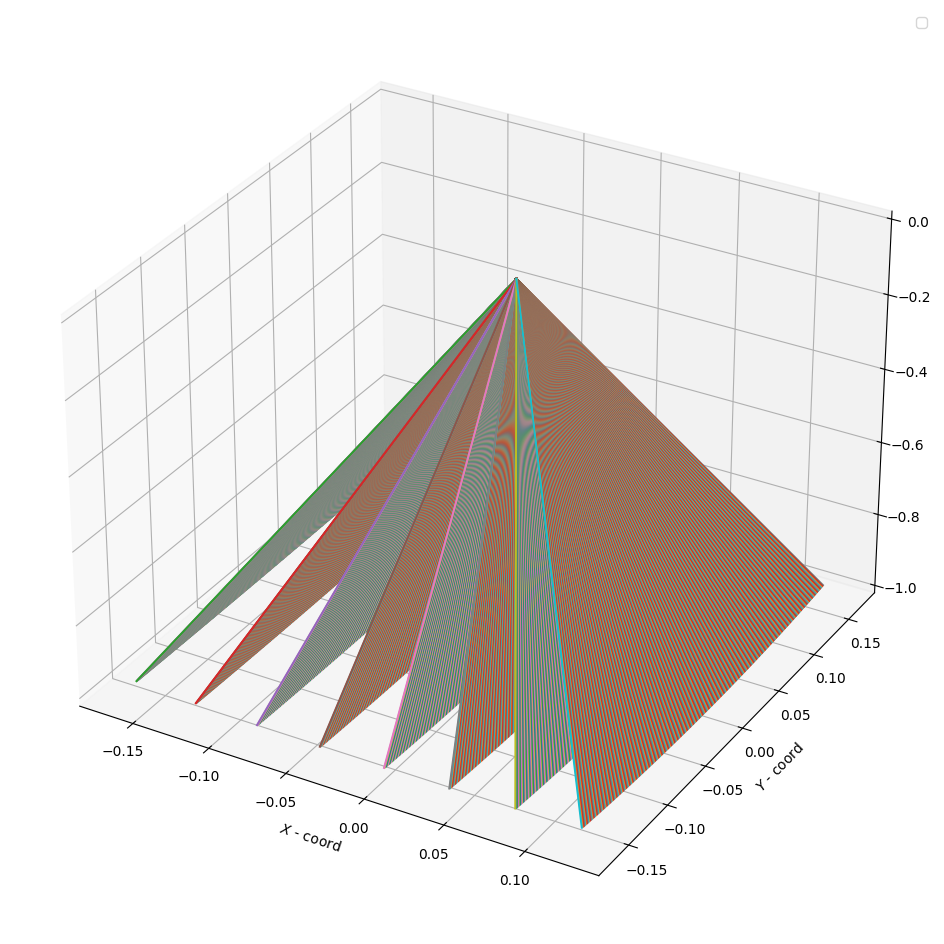

In [22]:
plot_rays(rays_origin, rays_direction.reshape(-1, 3), 1)